# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil, collected in 2016 and is focused on the question of whether or not patients show up for their appointment. Given characteristics are:
- **PatientId** - patient's unique identifier
- **AppointmentID** - appointment identifier (unique
- **Gender** - patient's gender
- **ScheduledDay** - appointment scheduled day
- **AppointmentDay** - day of actual appointment
- **Age** - patient's age
- **Neighbourhood** - location of hospital
- **Scholarship** - indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família (0: no, 1: yes)
- **Hipertension** - indicates whether or not the patient has a hypertension (0: no, 1: yes)
- **Diabetes** - indicates whether or not the patient has a diabetes (0: no, 1: yes)
- **Alcoholism** - indicates whether or not the patient has an alcoholism (0: no, 1: yes)
- **Handcap** - indicates whether or not the patient is handicaped 
- **SMS_received** - indicates whether the patient received SMS reminder about the appointment
- **No-show** - indicates whether the patient showed up (No) or miss the appointment (Yes)


### Question(s) for Analysis
**Main question:**
    Which factors are important for us to predict if a patient will show up for their scheduled appointment?

**Additional questions:**
    Is there any correlation between show ups and patient's age/gender. 
    Is there any relation between hospital itself and show up?
    How about received SMS, will it increase the probability of showups? 


<a id='wrangling'></a>
## Data Wrangling

Now, import the necessary libraries and load the data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
# Load the data set
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the above information and description, it can be easily seen that some of column names have a typo, and data type is incorrect:
- There is a typo on column name: 'Hipertension' -> 'Hypertension' and 'AppointmentID' -> 'AppointmenId'
- Data types:
  PatientId field is supposed to be a digit code, but it is shown as a float type, which doesn't make sense: float64 -> int64
  Scholarship, Hypertension, Diabetes, Alcoholism, SMS_received types has value 0 or 1. int64 -> int8
- In 'Age' column, there is one negative number, which is incorrect data: change it to the mean of 'Age'


In [4]:
# rename the columns with typo
df.rename(columns={'AppointmentID':'AppointmentId', 'Hipertension':'Hypertension','No-show':'No_show'}, inplace=True)

# change column type
df['PatientId'] = df['PatientId'].astype(int).astype(str)
df['AppointmentId'] = df['AppointmentId'].astype(int).astype(str)
columns = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received']
for column in columns:
    df[column] = df[column].astype('int8')


# connverting ScheduledDay & AppointmentDay into correct format
df.ScheduledDay = pd.to_datetime(df['ScheduledDay'])
df.AppointmentDay = pd.to_datetime(df['AppointmentDay'])

# make some columns as category type
df['No_show'] = df.No_show.astype('category')
df['Gender'] = df.Gender.astype('category')
df['Age'] = df.Age.astype('int8')



### Data Cleaning
Now, we will check for the duplication. And correct some invalid data. 

In [5]:
#check for duplication
sum(df.duplicated())

0

In [6]:
df.duplicated(['PatientId','AppointmentDay'])

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

In [7]:
# replace negative age values with median
median_age = df['Age'].median()
df['Age'] = df['Age'].apply(lambda x: median_age if x < 0 else x)

<a id='eda'></a>
## Exploratory Data Analysis
In order to visually analyze the data, we will get and check some basic relationships. Here, we will answer for questions - Is there any correlation between show ups and patient's age/gender. Is there any relation between hospital itself and show up? How about received SMS, will it increase the probability of showups?

### Is there any correlation between show ups and patient's age/gender?

Before going to the actual analysis, let's make two functions, that plots the figure according to the parameters.

In [8]:
def plot_pie(data, legend_value, title, xlabel):
    plt.figure(figsize=(5,5))
    plt.pie(data, autopct="%.01f%%")
    plt.legend(legend_value, loc='upper right')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

def plot_count(data, hue_data, title, legend):
    plt.figure(figsize=(6, 6))
    sbn.countplot(x=data, hue=hue_data)
    plt.title(title)
    plt.legend(legend)
    plt.show()

In [9]:
age_border = [0, 12, 18, 40, 60, 100]
df['Age_group'] = pd.cut(df['Age'], bins=age_border)

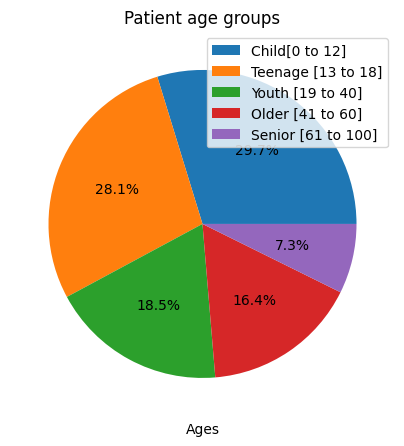

In [11]:
legend_value = ["Child[0 to 12]","Teenage [13 to 18]","Youth [19 to 40]","Older [41 to 60]","Senior [61 to 100]"]
plot_pie(df['Age_group'].value_counts(), legend_value, 'Patient age groups', 'Ages')

Above pie-chart shows patient's age group. More than half of patients are whether teenage or chilren.

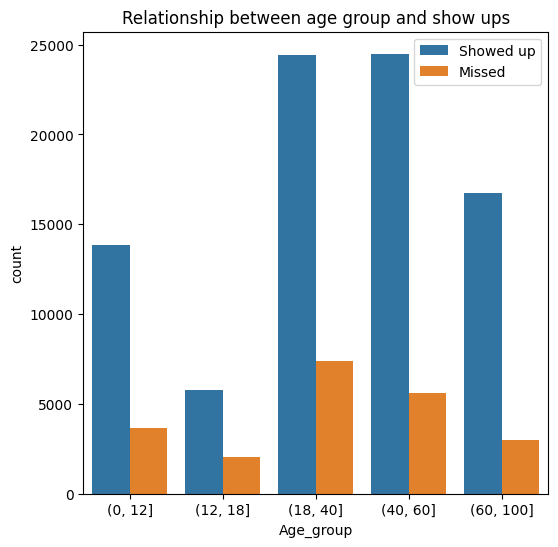

In [14]:
# relationship between age group and show ups
plot_count(df['Age_group'], df['No_show'], 'Relationship between age group and show ups', ['Showed up','Missed'])

**Conclusion:** From the above figure, we can't see the stron correlation; In any age group, 20\~30% of patients didn't come to the appointment day. But slightly, senior group patients (60\~100 group) have a higher rank (only 13% of all seniors didn't come) of attendance.

Now, we will check whether women or men are more strict on their appointment/schedules. 
65% of overall patients are women, and 35% are men.

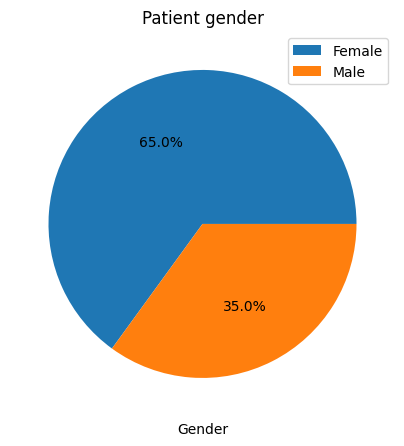

In [16]:
plot_pie(df['Gender'].value_counts(), ['Female', 'Male'], 'Patient gender', 'Gender')

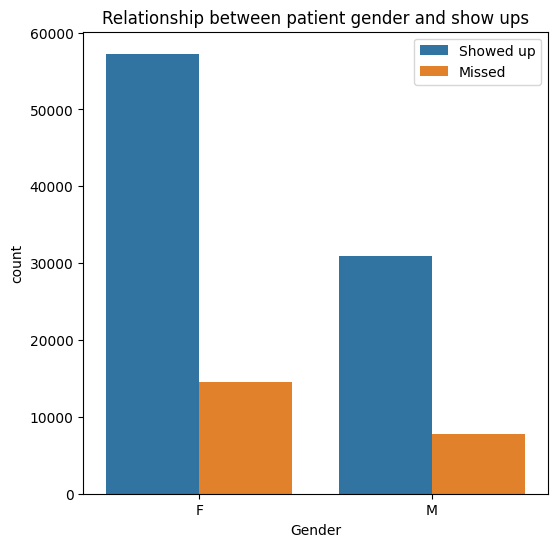

In [18]:
plot_count(df['Gender'], df['No_show'], 'Relationship between patient gender and show ups', ['Showed up','Missed'])

**Conclusion:** Keeping the appointment schedule does not depend on the patient's gender. Almost 20% of patients from either gender didn't come to the appointment. 

### Does the received SMS have an impact on show-ups?

Now, we will check whether received SMS imapacts on show-ups or not.

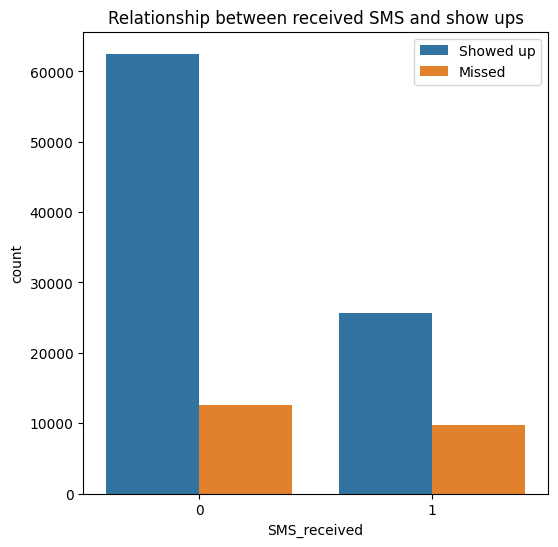

In [20]:
# relationship between sms received and show ups
plot_count(df['SMS_received'], df['No_show'], 'Relationship between received SMS and show ups', ['Showed up','Missed'])

Again we can't see any significant relation. Patients despite of reminding through SMS message, may miss their appointments. 

**Conclusion:** Around 30% of patients didn't come to the scheduled meeting even though they have received a SMS message, while only 15% of patients, who received SMS reminders were absent. 

### Is there any relation between hospital itself and show up?

Maybe, people choose hospitals? What if, some hospitals have a higher percent of show-ups? Let's check it!

In [21]:
# get top 10 famous hospitals
hospitals_name = df.groupby(['Neighbourhood'], observed=True)['PatientId'].size().sort_values(ascending=False).index[0:10]

In [22]:
# get the correlation between top hospitals and show ups
df_hospitals = df[df['Neighbourhood'].isin(hospitals_name)].groupby(['Neighbourhood', 'No_show'], observed=True)['PatientId'].size()
df_hospitals

Neighbourhood      No_show
BONFIM             No         2223
                   Yes         550
CENTRO             No         2631
                   Yes         703
ITARARÉ            No         2591
                   Yes         923
JARDIM CAMBURI     No         6252
                   Yes        1465
JARDIM DA PENHA    No         3246
                   Yes         631
JESUS DE NAZARETH  No         2157
                   Yes         696
MARIA ORTIZ        No         4586
                   Yes        1219
RESISTÊNCIA        No         3525
                   Yes         906
SANTA MARTHA       No         2635
                   Yes         496
TABUAZEIRO         No         2559
                   Yes         573
Name: PatientId, dtype: int64

<Axes: ylabel='Neighbourhood'>

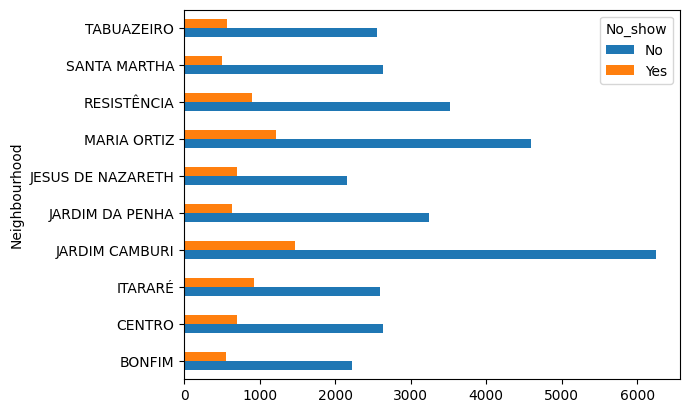

In [23]:
# visualize this correlation
df_hospitals.unstack(1).plot.barh()

Again, not strong correlation - attendance to the pre-scheduled meeting does not depend on hospital's location. 

**Conclusion:** Around 15~20% of patients didn't come to the prescheduled meetings in all hospitals (in above example, we show just top 10 hospitals). 

<a id='conclusions'></a>
## Conclusions

**1**: We couldn't find any strong correlation between show-ups and age/gender/SMS reminders/or hospitals

**2**: There are always around 15~20% of patients who do not keep the schedule, and miss their appointments. 

**3**: We didn't check the correlation between diagnosis and show-ups/hospitals.

### Limitations
- Appointment time is incorrect. Therefore, waiting time (difference between scheduling data and actual appointment time) was not used in the analysis.

- There is no information about distance between patient's location and hospital, or how long does patient spend to reach the hospital. This may be one of the main factors for no-show results.

- From the diagnosis of handicapnes has categorical value within [0, 1, 2, 3, 4], but explanation was given only for "whether patient is handicap or not". Most probably, value is used to differentiate handicap type between patients; however, it is not used in the analysis since it was not clearly defined.


In [24]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 510428 bytes to Investigate_a_Dataset.html
